In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



In [2]:
mutation_data = pd.read_csv('full_mutation_data.csv')

In [3]:
mutation_data

,Unnamed: 0,Patient,gene,gene_variant,loci,ref,alt,gene_type,mutation_nucleotide,mutation_aminoacide
0,0,MF362760,ND1,upstream_gene_variant,152,T,C,protein_coding,c.-3155T>C,NaN
1,1,MF362760,ND1,upstream_gene_variant,186,C,A,protein_coding,c.-3121C>A,NaN
2,2,MF362760,ND1,upstream_gene_variant,263,A,G,protein_coding,c.-3044A>G,NaN
3,3,MF362760,ND1,upstream_gene_variant,750,A,G,protein_coding,c.-2557A>G,NaN
4,4,MF362760,ND1,upstream_gene_variant,1438,A,G,protein_coding,c.-1869A>G,NaN
...,...,...,...,...,...,...,...,...,...,...
2676,2676,KF540700,ND6,upstream_gene_variant,16223,C,T,protein_coding,c.-1550G>A,NaN
2677,2677,KF540700,ND6,upstream_gene_variant,16242,C,T,protein_coding,c.-1569G>A,NaN
2678,2678,KF540700,ND6,upstream_gene_variant,16249,T,C,protein_coding,c.-1576A>G,NaN
2679,2679,KF540700,ND6,upstream_gene_variant,16319,G,A,protein_coding,c.-1646C>T,NaN


In [4]:
# Filtering the dataset based on the patient origin (Chinese and Armenian)
chinese_patients = mutation_data[mutation_data['Patient'].str.startswith('KF')]
armenian_patients = mutation_data[mutation_data['Patient'].str.startswith('MF')]


# Number of unique mutations
unique_mutations_chinese = chinese_patients.drop_duplicates(subset=['gene', 'loci', 'ref', 'alt']).shape[0]
unique_mutations_armenian = armenian_patients.drop_duplicates(subset=['gene', 'loci', 'ref', 'alt']).shape[0]

(unique_mutations_chinese, unique_mutations_armenian)


(384, 337)

In [5]:
# Filtering the dataset for mutations in the CYTB gene for both Chinese and Armenian populations
CYTB_chinese = chinese_patients[chinese_patients['gene'] == 'CYTB']
CYTB_armenian = armenian_patients[armenian_patients['gene'] == 'CYTB']

# Analyzing CYTB mutations
# 1. Number of unique mutations in CYTB for each population
# 2. Distribution of CYTB mutations across loci
# 3. Types of CYTB gene variants

# Number of unique mutations in CYTB
unique_CYTB_mutations_chinese = CYTB_chinese.drop_duplicates(subset=['loci', 'ref', 'alt']).shape[0]
unique_CYTB_mutations_armenian = CYTB_armenian.drop_duplicates(subset=['loci', 'ref', 'alt']).shape[0]

(unique_CYTB_mutations_chinese, unique_CYTB_mutations_armenian)


(35, 26)

In [6]:
# Filtering the dataset for synonymous and non-synonymous mutations in the CYTB gene
CYTB_chinese_synonymous = CYTB_chinese[CYTB_chinese['gene_variant'] == 'synonymous_variant']
CYTB_chinese_missense = CYTB_chinese[CYTB_chinese['gene_variant'] == 'missense_variant']
CYTB_armenian_synonymous = CYTB_armenian[CYTB_armenian['gene_variant'] == 'synonymous_variant']
CYTB_armenian_missense = CYTB_armenian[CYTB_armenian['gene_variant'] == 'missense_variant']

# Counting the number of synonymous (dS) and non-synonymous (dN) mutations in each population
chinese_dS = CYTB_chinese_synonymous.shape[0]
chinese_dN = CYTB_chinese_missense.shape[0]
armenian_dS = CYTB_armenian_synonymous.shape[0]
armenian_dN = CYTB_armenian_missense.shape[0]

# Calculating the dN/dS ratio for each population
# Avoid division by zero by adding a small number (epsilon) to the denominator
epsilon = 1e-6
chinese_dN_dS_ratio = chinese_dN / (chinese_dS + epsilon)
armenian_dN_dS_ratio = armenian_dN / (armenian_dS + epsilon)

(chinese_dN_dS_ratio, armenian_dN_dS_ratio, chinese_dN, chinese_dS, armenian_dN, armenian_dS)


(1.2674418457274204, 3.064516030176902, 109, 86, 95, 31)

In [7]:
CYTB_armenian

,Unnamed: 0,Patient,gene,gene_variant,loci,ref,alt,gene_type,mutation_nucleotide,mutation_aminoacide
8,8,MF362760,CYTB,missense_variant,15326,A,G,protein_coding,c.580A>G,p.Thr194Ala
34,34,MF362761,CYTB,missense_variant,14766,C,T,protein_coding,c.20C>T,p.Thr7Ile
35,35,MF362761,CYTB,synonymous_variant,14905,G,A,protein_coding,c.159G>A,p.Met53Met
36,36,MF362761,CYTB,missense_variant,15326,A,G,protein_coding,c.580A>G,p.Thr194Ala
37,37,MF362761,CYTB,missense_variant,15452,C,A,protein_coding,c.706C>A,p.Leu236Ile
...,...,...,...,...,...,...,...,...,...,...
1167,1167,MF362801,CYTB,missense_variant,15452,C,A,protein_coding,c.706C>A,p.Leu236Ile
1185,1185,MF362802,CYTB,missense_variant,15326,A,G,protein_coding,c.580A>G,p.Thr194Ala
1197,1197,MF362803,CYTB,missense_variant,14831,G,A,protein_coding,c.85G>A,p.Ala29Thr
1198,1198,MF362803,CYTB,missense_variant,15326,A,G,protein_coding,c.580A>G,p.Thr194Ala


In [8]:
CYTB_armenian_synonymous

,Unnamed: 0,Patient,gene,gene_variant,loci,ref,alt,gene_type,mutation_nucleotide,mutation_aminoacide
35,35,MF362761,CYTB,synonymous_variant,14905,G,A,protein_coding,c.159G>A,p.Met53Met
38,38,MF362761,CYTB,synonymous_variant,15607,A,G,protein_coding,c.861A>G,p.Lys287Lys
65,65,MF362762,CYTB,synonymous_variant,14905,G,A,protein_coding,c.159G>A,p.Met53Met
68,68,MF362762,CYTB,synonymous_variant,15607,A,G,protein_coding,c.861A>G,p.Lys287Lys
110,110,MF362763,CYTB,synonymous_variant,15679,A,G,protein_coding,c.933A>G,p.Lys311Lys
153,153,MF362765,CYTB,synonymous_variant,15310,T,C,protein_coding,c.564T>C,p.Ile188Ile
188,188,MF362766,CYTB,synonymous_variant,15043,G,A,protein_coding,c.297G>A,p.Gly99Gly
190,190,MF362766,CYTB,synonymous_variant,15355,G,A,protein_coding,c.609G>A,p.Thr203Thr
226,226,MF362767,CYTB,synonymous_variant,14905,G,A,protein_coding,c.159G>A,p.Met53Met
229,229,MF362767,CYTB,synonymous_variant,15607,A,G,protein_coding,c.861A>G,p.Lys287Lys


In [9]:
CYTB_armenian_missense

,Unnamed: 0,Patient,gene,gene_variant,loci,ref,alt,gene_type,mutation_nucleotide,mutation_aminoacide
8,8,MF362760,CYTB,missense_variant,15326,A,G,protein_coding,c.580A>G,p.Thr194Ala
34,34,MF362761,CYTB,missense_variant,14766,C,T,protein_coding,c.20C>T,p.Thr7Ile
36,36,MF362761,CYTB,missense_variant,15326,A,G,protein_coding,c.580A>G,p.Thr194Ala
37,37,MF362761,CYTB,missense_variant,15452,C,A,protein_coding,c.706C>A,p.Leu236Ile
64,64,MF362762,CYTB,missense_variant,14766,C,T,protein_coding,c.20C>T,p.Thr7Ile
...,...,...,...,...,...,...,...,...,...,...
1167,1167,MF362801,CYTB,missense_variant,15452,C,A,protein_coding,c.706C>A,p.Leu236Ile
1185,1185,MF362802,CYTB,missense_variant,15326,A,G,protein_coding,c.580A>G,p.Thr194Ala
1197,1197,MF362803,CYTB,missense_variant,14831,G,A,protein_coding,c.85G>A,p.Ala29Thr
1198,1198,MF362803,CYTB,missense_variant,15326,A,G,protein_coding,c.580A>G,p.Thr194Ala


In [10]:
CYTB_chinese_synonymous

,Unnamed: 0,Patient,gene,gene_variant,loci,ref,alt,gene_type,mutation_nucleotide,mutation_aminoacide
1248,1248,KF540656,CYTB,synonymous_variant,14783,T,C,protein_coding,c.37T>C,p.Leu13Leu
1249,1249,KF540656,CYTB,synonymous_variant,15043,G,A,protein_coding,c.297G>A,p.Gly99Gly
1250,1250,KF540656,CYTB,synonymous_variant,15106,G,A,protein_coding,c.360G>A,p.Leu120Leu
1251,1251,KF540656,CYTB,synonymous_variant,15289,T,C,protein_coding,c.543T>C,p.Phe181Phe
1252,1252,KF540656,CYTB,synonymous_variant,15301,G,A,protein_coding,c.555G>A,p.Leu185Leu
...,...,...,...,...,...,...,...,...,...,...
2583,2583,KF540697,CYTB,synonymous_variant,15301,G,A,protein_coding,c.555G>A,p.Leu185Leu
2615,2615,KF540698,CYTB,synonymous_variant,14971,T,C,protein_coding,c.225T>C,p.Tyr75Tyr
2671,2671,KF540700,CYTB,synonymous_variant,14783,T,C,protein_coding,c.37T>C,p.Leu13Leu
2672,2672,KF540700,CYTB,synonymous_variant,15043,G,A,protein_coding,c.297G>A,p.Gly99Gly


In [11]:
CYTB_chinese_missense

,Unnamed: 0,Patient,gene,gene_variant,loci,ref,alt,gene_type,mutation_nucleotide,mutation_aminoacide
1247,1247,KF540656,CYTB,missense_variant,14766,C,T,protein_coding,c.20C>T,p.Thr7Ile
1253,1253,KF540656,CYTB,missense_variant,15326,A,G,protein_coding,c.580A>G,p.Thr194Ala
1286,1286,KF540657,CYTB,missense_variant,14766,C,T,protein_coding,c.20C>T,p.Thr7Ile
1290,1290,KF540657,CYTB,missense_variant,15326,A,G,protein_coding,c.580A>G,p.Thr194Ala
1318,1318,KF540658,CYTB,missense_variant,14766,C,T,protein_coding,c.20C>T,p.Thr7Ile
...,...,...,...,...,...,...,...,...,...,...
2636,2636,KF540699,CYTB,missense_variant,14766,C,T,protein_coding,c.20C>T,p.Thr7Ile
2637,2637,KF540699,CYTB,missense_variant,15326,A,G,protein_coding,c.580A>G,p.Thr194Ala
2670,2670,KF540700,CYTB,missense_variant,14766,C,T,protein_coding,c.20C>T,p.Thr7Ile
2673,2673,KF540700,CYTB,missense_variant,15236,A,G,protein_coding,c.490A>G,p.Ile164Val


In [12]:
common_CYTB_armenian_cols = CYTB_armenian['mutation_nucleotide'].isin(CYTB_chinese['mutation_nucleotide'])
common_CYTB_armenian_cols
common_CYTB_armenian = CYTB_armenian.loc[common_CYTB_armenian_cols, :]
common_CYTB_armenian

,Unnamed: 0,Patient,gene,gene_variant,loci,ref,alt,gene_type,mutation_nucleotide,mutation_aminoacide
8,8,MF362760,CYTB,missense_variant,15326,A,G,protein_coding,c.580A>G,p.Thr194Ala
34,34,MF362761,CYTB,missense_variant,14766,C,T,protein_coding,c.20C>T,p.Thr7Ile
36,36,MF362761,CYTB,missense_variant,15326,A,G,protein_coding,c.580A>G,p.Thr194Ala
64,64,MF362762,CYTB,missense_variant,14766,C,T,protein_coding,c.20C>T,p.Thr7Ile
66,66,MF362762,CYTB,missense_variant,15326,A,G,protein_coding,c.580A>G,p.Thr194Ala
...,...,...,...,...,...,...,...,...,...,...
1166,1166,MF362801,CYTB,missense_variant,15326,A,G,protein_coding,c.580A>G,p.Thr194Ala
1185,1185,MF362802,CYTB,missense_variant,15326,A,G,protein_coding,c.580A>G,p.Thr194Ala
1197,1197,MF362803,CYTB,missense_variant,14831,G,A,protein_coding,c.85G>A,p.Ala29Thr
1198,1198,MF362803,CYTB,missense_variant,15326,A,G,protein_coding,c.580A>G,p.Thr194Ala


In [13]:
common_CYTB_chinese_cols = CYTB_chinese['mutation_nucleotide'].isin(CYTB_armenian['mutation_nucleotide'])
common_CYTB_chinese_cols
common_CYTB_chinese = CYTB_chinese.loc[common_CYTB_chinese_cols, :]
common_CYTB_chinese

,Unnamed: 0,Patient,gene,gene_variant,loci,ref,alt,gene_type,mutation_nucleotide,mutation_aminoacide
1247,1247,KF540656,CYTB,missense_variant,14766,C,T,protein_coding,c.20C>T,p.Thr7Ile
1249,1249,KF540656,CYTB,synonymous_variant,15043,G,A,protein_coding,c.297G>A,p.Gly99Gly
1253,1253,KF540656,CYTB,missense_variant,15326,A,G,protein_coding,c.580A>G,p.Thr194Ala
1286,1286,KF540657,CYTB,missense_variant,14766,C,T,protein_coding,c.20C>T,p.Thr7Ile
1288,1288,KF540657,CYTB,synonymous_variant,15043,G,A,protein_coding,c.297G>A,p.Gly99Gly
...,...,...,...,...,...,...,...,...,...,...
2636,2636,KF540699,CYTB,missense_variant,14766,C,T,protein_coding,c.20C>T,p.Thr7Ile
2637,2637,KF540699,CYTB,missense_variant,15326,A,G,protein_coding,c.580A>G,p.Thr194Ala
2670,2670,KF540700,CYTB,missense_variant,14766,C,T,protein_coding,c.20C>T,p.Thr7Ile
2672,2672,KF540700,CYTB,synonymous_variant,15043,G,A,protein_coding,c.297G>A,p.Gly99Gly


In [14]:
# Filtering the dataset for synonymous and non-synonymous mutations in the CYTB gene
common_CYTB_chinese_synonymous = common_CYTB_chinese[common_CYTB_chinese['gene_variant'] == 'synonymous_variant']
common_CYTB_chinese_missense = common_CYTB_chinese[common_CYTB_chinese['gene_variant'] == 'missense_variant']
common_CYTB_armenian_synonymous = common_CYTB_armenian[common_CYTB_armenian['gene_variant'] == 'synonymous_variant']
common_CYTB_armenian_missense = common_CYTB_armenian[common_CYTB_armenian['gene_variant'] == 'missense_variant']

# Counting the number of synonymous (dS) and non-synonymous (dN) mutations in each population
common_chinese_dS = common_CYTB_chinese_synonymous.shape[0]
common_chinese_dN = common_CYTB_chinese_missense.shape[0]
common_armenian_dS = common_CYTB_armenian_synonymous.shape[0]
common_armenian_dN = common_CYTB_armenian_missense.shape[0]

# Calculating the dN/dS ratio for each population
# Avoid division by zero by adding a small number (epsilon) to the denominator
epsilon = 1e-6
common_chinese_dN_dS_ratio = common_chinese_dN / (common_chinese_dS + epsilon)
common_armenian_dN_dS_ratio = common_armenian_dN / (common_armenian_dS + epsilon)

(common_chinese_dN_dS_ratio, common_armenian_dN_dS_ratio, common_chinese_dN, common_chinese_dS, common_armenian_dN, common_armenian_dS)


(4.499999775000011, 73.99992600007401, 90, 20, 74, 1)

In [15]:
# Create a boolean mask to identify common rows in CYTB_armenian
mask = CYTB_armenian[['gene', 'gene_variant', 'loci', 'ref', 'alt', 'gene_type', 'mutation_nucleotide', 'mutation_aminoacide']].isin(common_CYTB_armenian[['gene', 'gene_variant', 'loci', 'ref', 'alt', 'gene_type', 'mutation_nucleotide', 'mutation_aminoacide']]).all(axis=1)

# Invert the mask to select rows that are not common
CYTB_armenian_unique = CYTB_armenian[~mask]

# Display the DataFrame with unique mutations for CYTB_armenian
CYTB_armenian_unique


,Unnamed: 0,Patient,gene,gene_variant,loci,ref,alt,gene_type,mutation_nucleotide,mutation_aminoacide
35,35,MF362761,CYTB,synonymous_variant,14905,G,A,protein_coding,c.159G>A,p.Met53Met
37,37,MF362761,CYTB,missense_variant,15452,C,A,protein_coding,c.706C>A,p.Leu236Ile
38,38,MF362761,CYTB,synonymous_variant,15607,A,G,protein_coding,c.861A>G,p.Lys287Lys
65,65,MF362762,CYTB,synonymous_variant,14905,G,A,protein_coding,c.159G>A,p.Met53Met
67,67,MF362762,CYTB,missense_variant,15452,C,A,protein_coding,c.706C>A,p.Leu236Ile
68,68,MF362762,CYTB,synonymous_variant,15607,A,G,protein_coding,c.861A>G,p.Lys287Lys
107,107,MF362763,CYTB,missense_variant,15257,G,A,protein_coding,c.511G>A,p.Asp171Asn
109,109,MF362763,CYTB,missense_variant,15452,C,A,protein_coding,c.706C>A,p.Leu236Ile
110,110,MF362763,CYTB,synonymous_variant,15679,A,G,protein_coding,c.933A>G,p.Lys311Lys
153,153,MF362765,CYTB,synonymous_variant,15310,T,C,protein_coding,c.564T>C,p.Ile188Ile


In [16]:
# Create a boolean mask to identify common rows in CYTB_armenian
mask = CYTB_chinese[['gene', 'gene_variant', 'loci', 'ref', 'alt', 'gene_type', 'mutation_nucleotide', 'mutation_aminoacide']].isin(common_CYTB_chinese[['gene', 'gene_variant', 'loci', 'ref', 'alt', 'gene_type', 'mutation_nucleotide', 'mutation_aminoacide']]).all(axis=1)

# Invert the mask to select rows that are not common
CYTB_chinese_unique = CYTB_chinese[~mask]

# Display the DataFrame with unique mutations for CYTB_armenian
CYTB_chinese_unique


,Unnamed: 0,Patient,gene,gene_variant,loci,ref,alt,gene_type,mutation_nucleotide,mutation_aminoacide
1248,1248,KF540656,CYTB,synonymous_variant,14783,T,C,protein_coding,c.37T>C,p.Leu13Leu
1250,1250,KF540656,CYTB,synonymous_variant,15106,G,A,protein_coding,c.360G>A,p.Leu120Leu
1251,1251,KF540656,CYTB,synonymous_variant,15289,T,C,protein_coding,c.543T>C,p.Phe181Phe
1252,1252,KF540656,CYTB,synonymous_variant,15301,G,A,protein_coding,c.555G>A,p.Leu185Leu
1254,1254,KF540656,CYTB,synonymous_variant,15712,A,G,protein_coding,c.966A>G,p.Gln322Gln
...,...,...,...,...,...,...,...,...,...,...
2583,2583,KF540697,CYTB,synonymous_variant,15301,G,A,protein_coding,c.555G>A,p.Leu185Leu
2615,2615,KF540698,CYTB,synonymous_variant,14971,T,C,protein_coding,c.225T>C,p.Tyr75Tyr
2671,2671,KF540700,CYTB,synonymous_variant,14783,T,C,protein_coding,c.37T>C,p.Leu13Leu
2673,2673,KF540700,CYTB,missense_variant,15236,A,G,protein_coding,c.490A>G,p.Ile164Val


In [17]:
# Filtering the dataset for synonymous and non-synonymous mutations in the CYTB gene
CYTB_chinese_synonymous_unique = CYTB_chinese_unique[CYTB_chinese_unique['gene_variant'] == 'synonymous_variant']
CYTB_chinese_missense_unique = CYTB_chinese_unique[CYTB_chinese_unique['gene_variant'] == 'missense_variant']
CYTB_armenian_synonymous_unique = CYTB_armenian_unique[CYTB_armenian_unique['gene_variant'] == 'synonymous_variant']
CYTB_armenian_missense_unique = CYTB_armenian_unique[CYTB_armenian_unique['gene_variant'] == 'missense_variant']

# Counting the number of synonymous (dS) and non-synonymous (dN) mutations in each population
chinese_dS_unique = CYTB_chinese_synonymous_unique.shape[0]
chinese_dN_unique = CYTB_chinese_missense_unique.shape[0]
armenian_dS_unique = CYTB_armenian_synonymous_unique.shape[0]
armenian_dN_unique = CYTB_armenian_missense_unique.shape[0]

# Calculating the dN/dS ratio for each population
# Avoid division by zero by adding a small number (epsilon) to the denominator
epsilon = 1e-6
chinese_dN_dS_ratio_unique = chinese_dN_unique / (chinese_dS_unique + epsilon)
armenian_dN_dS_ratio_unique = armenian_dN_unique / (armenian_dS_unique + epsilon)

(chinese_dN_dS_ratio_unique, armenian_dN_dS_ratio_unique, chinese_dN_unique, chinese_dS_unique, armenian_dN_unique, armenian_dS_unique)


(0.28787878351698815, 0.6999999766666675, 19, 66, 21, 30)

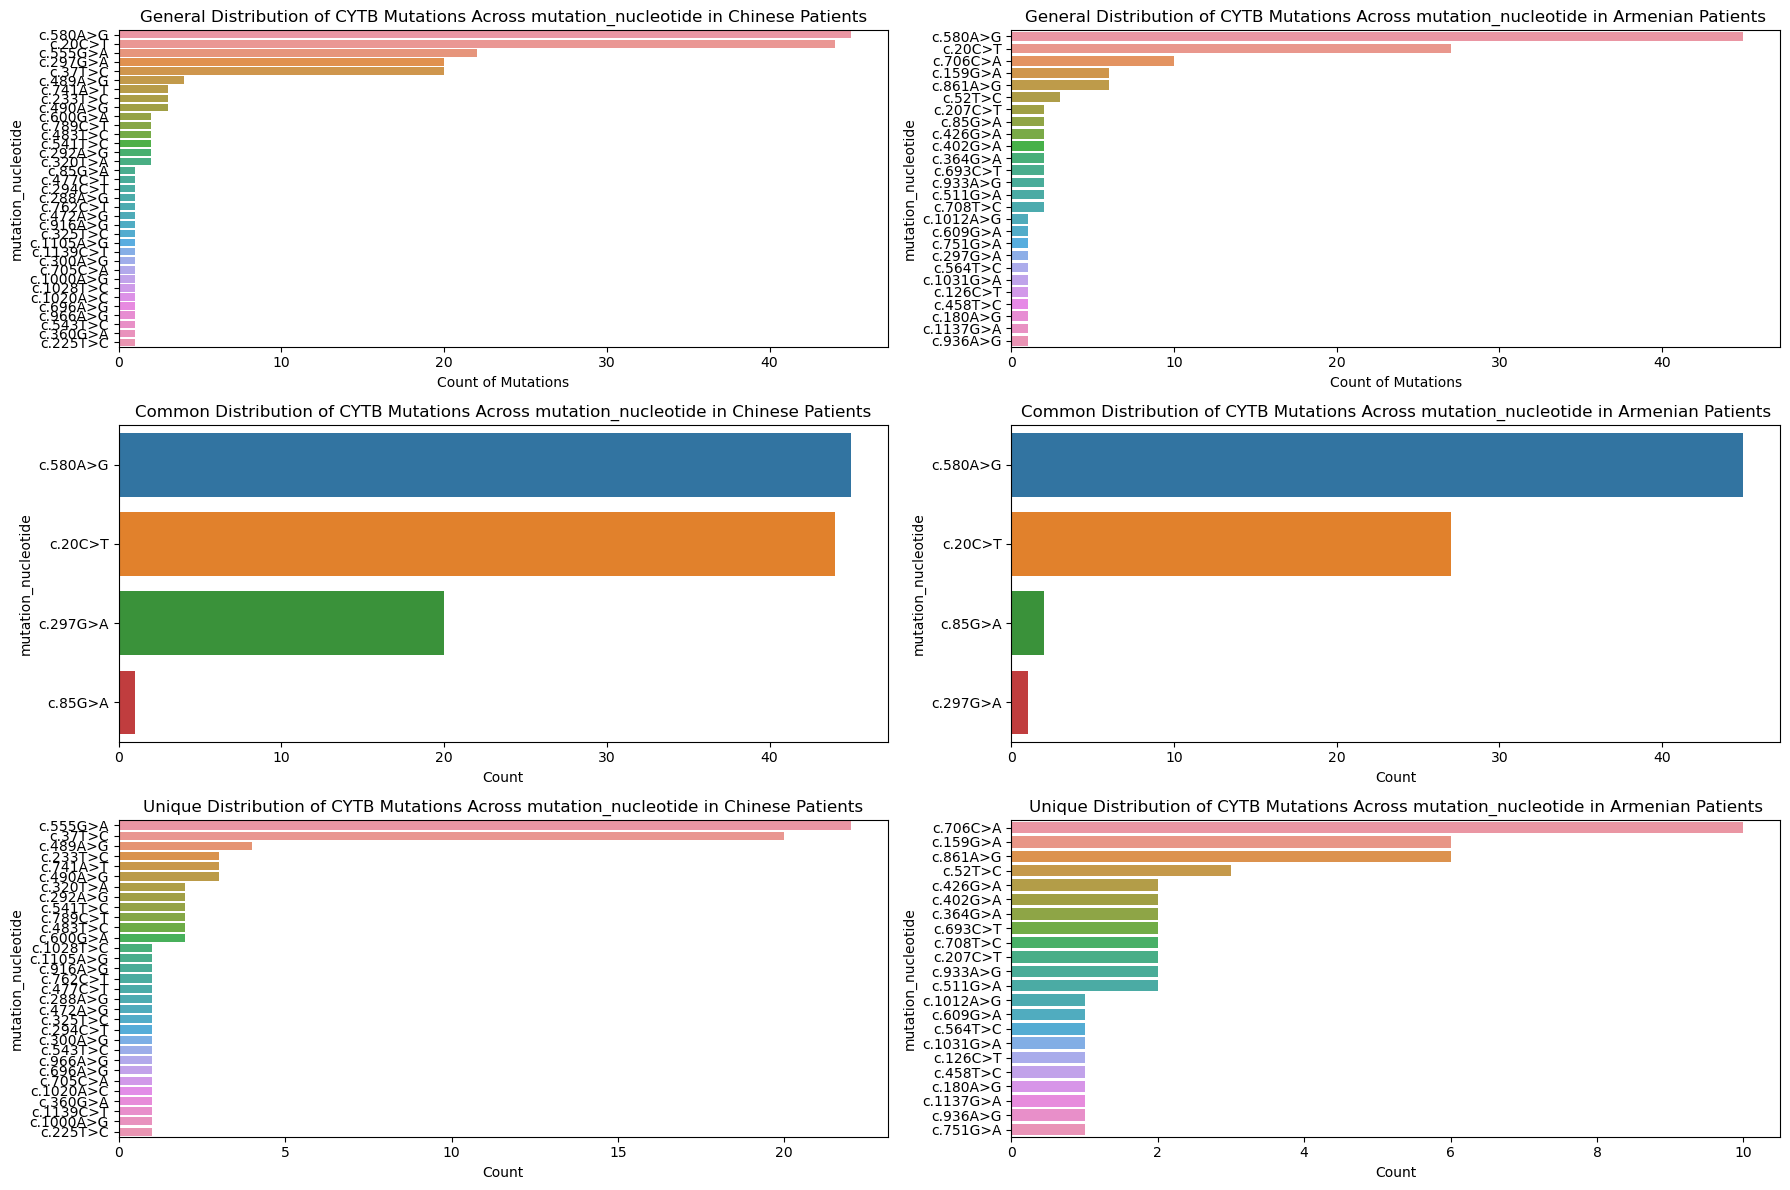

(35, 26)

In [21]:
# Filtering the dataset for mutations in the CYTB gene for both Chinese and Armenian populations
# Analyzing CYTB mutations
# 1. Number of unique mutations in CYTB for each population
# 2. Distribution of CYTB mutations across loci
# 3. Types of CYTB gene variants

# Creating subplots for visualization
fig, axes = plt.subplots(3, 2, figsize=(18, 12))

# Plot 1: Distribution of CYTB mutations across loci for Chinese patients
sns.countplot(y="mutation_nucleotide", data=CYTB_chinese, order=CYTB_chinese['mutation_nucleotide'].value_counts().index, ax=axes[0, 0])
axes[0, 0].set_title('General Distribution of CYTB Mutations Across mutation_nucleotide in Chinese Patients')
axes[0, 0].set_xlabel('Count of Mutations')
axes[0, 0].set_ylabel('mutation_nucleotide')

# Plot 2: Distribution of CYTB mutations across loci for Armenian patients
sns.countplot(y="mutation_nucleotide", data=CYTB_armenian, order=CYTB_armenian['mutation_nucleotide'].value_counts().index, ax=axes[0, 1])
axes[0, 1].set_title('General Distribution of CYTB Mutations Across mutation_nucleotide in Armenian Patients')
axes[0, 1].set_xlabel('Count of Mutations')
axes[0, 1].set_ylabel('mutation_nucleotide')

# Plot 3: Types of CYTB gene variants in Chinese patients
sns.countplot(y="mutation_nucleotide", data=common_CYTB_chinese, order= common_CYTB_chinese['mutation_nucleotide'].value_counts().index, ax=axes[1, 0])
axes[1, 0].set_title('Common Distribution of CYTB Mutations Across mutation_nucleotide in Chinese Patients')
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_ylabel('mutation_nucleotide')

# Plot 4: Types of CYTB gene variants in Armenian patients
sns.countplot(y="mutation_nucleotide", data=common_CYTB_armenian, order=common_CYTB_armenian['mutation_nucleotide'].value_counts().index, ax=axes[1, 1])
axes[1, 1].set_title('Common Distribution of CYTB Mutations Across mutation_nucleotide in Armenian Patients')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('mutation_nucleotide')

# Plot 5: Types of CYTB gene variants in Chinese patients
sns.countplot(y="mutation_nucleotide", data=CYTB_chinese_unique, order= CYTB_chinese_unique['mutation_nucleotide'].value_counts().index, ax=axes[2, 0])
axes[2, 0].set_title('Unique Distribution of CYTB Mutations Across mutation_nucleotide in Chinese Patients')
axes[2, 0].set_xlabel('Count')
axes[2, 0].set_ylabel('mutation_nucleotide')

# Plot 6: Types of CYTB gene variants in Armenian patients
sns.countplot(y="mutation_nucleotide", data=CYTB_armenian_unique, order=CYTB_armenian_unique['mutation_nucleotide'].value_counts().index, ax=axes[2, 1])
axes[2, 1].set_title('Unique Distribution of CYTB Mutations Across mutation_nucleotide in Armenian Patients')
axes[2, 1].set_xlabel('Count')
axes[2, 1].set_ylabel('mutation_nucleotide')

plt.tight_layout()
plt.show()




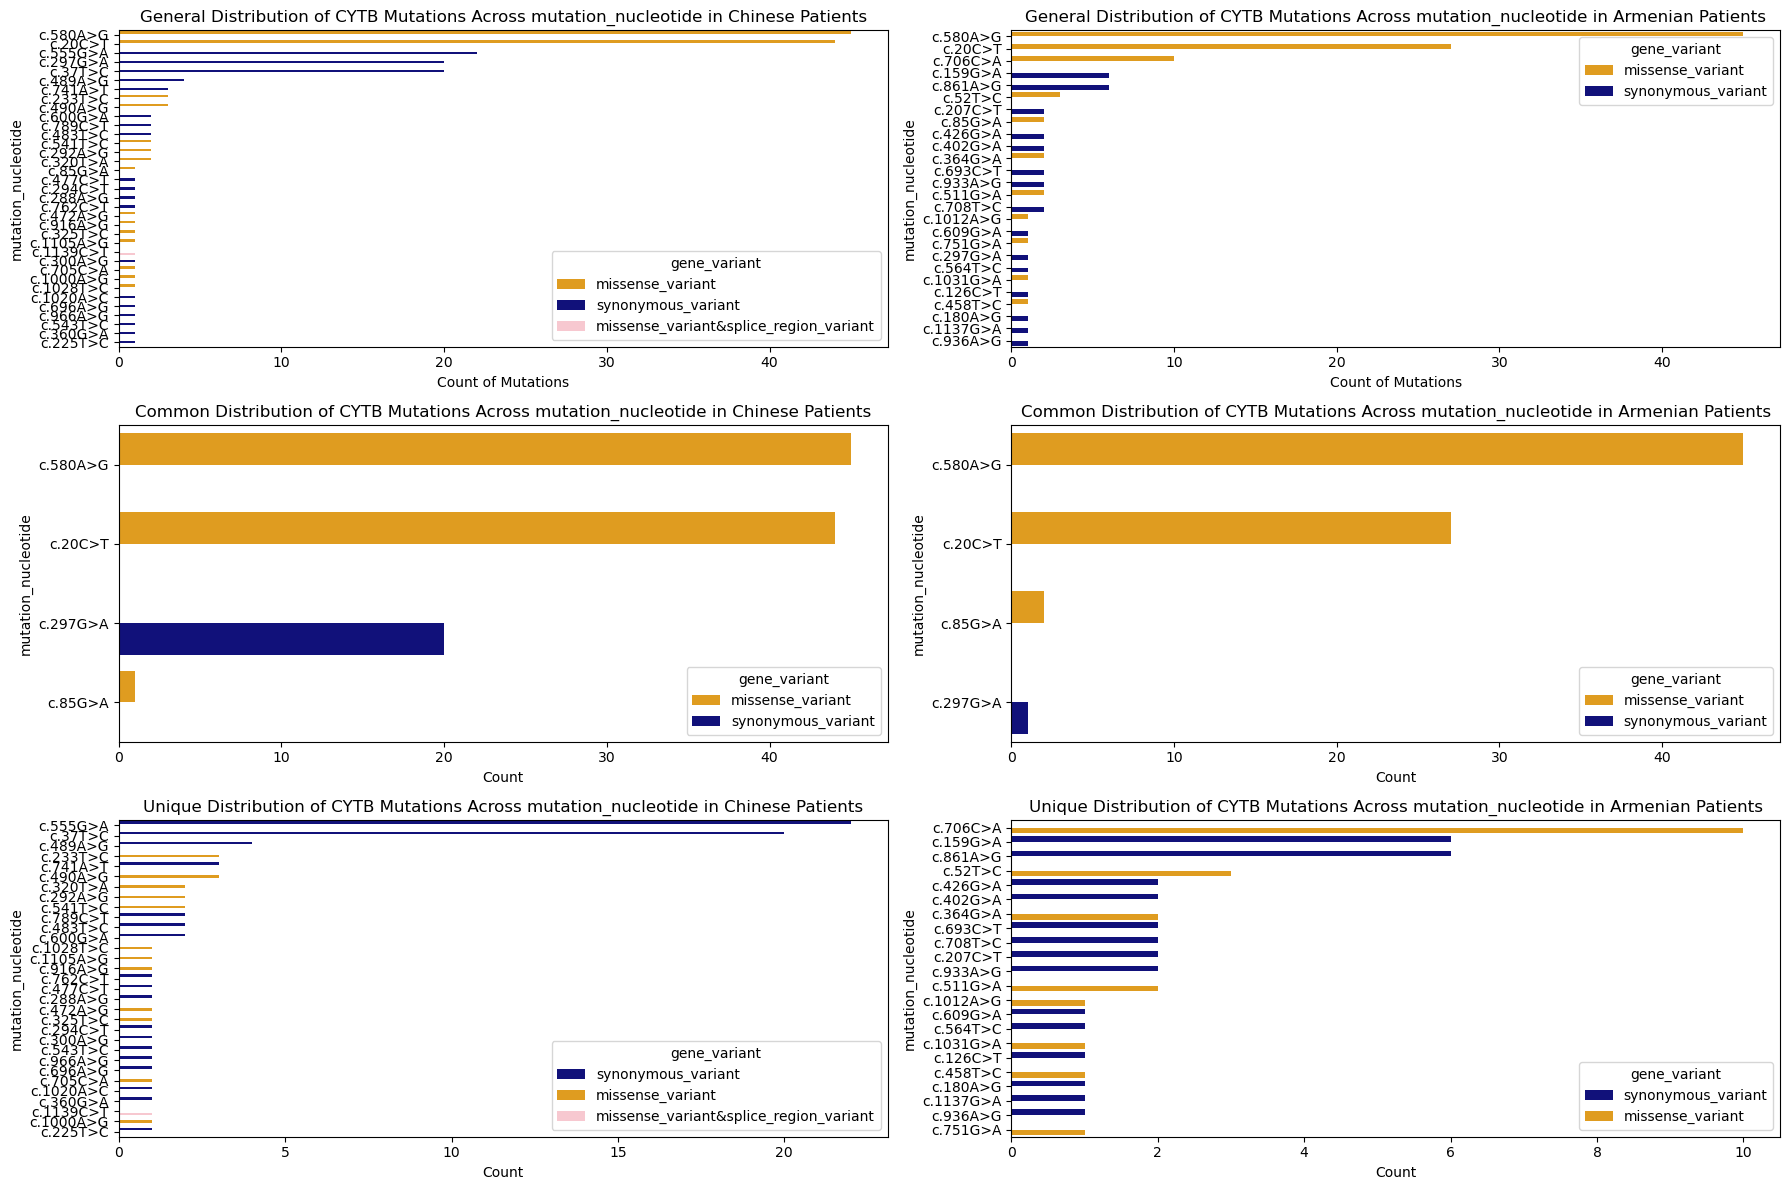

General dn/ds Chinese 1.2674418457274204
General dn/ds Armenian 3.064516030176902
Common dn/ds Chinese 4.499999775000011
Common dn/ds Armenian 73.99992600007401
Unique dn/ds Chinese 0.28787878351698815
Unique dn/ds Armenian 0.6999999766666675


In [22]:
# Filtering the dataset for mutations in the CYTB gene for both Chinese and Armenian populations
# Analyzing CYTB mutations
# 1. Number of unique mutations in CYTB for each population
# 2. Distribution of CYTB mutations across loci
# 3. Types of CYTB gene variants

# Creating subplots for visualization
fig, axes = plt.subplots(3, 2, figsize=(18, 12))

# Plot 1: Distribution of CYTB mutations across loci for Chinese patients
hue_column = 'gene_variant'
color_palette = {"synonymous_variant": "darkblue", "missense_variant": "orange", 'upstream_gene_variant': "darkgreen", 'missense_variant&splice_region_variant': "pink"}
sns.countplot(y="mutation_nucleotide", data=CYTB_chinese, order=CYTB_chinese['mutation_nucleotide'].value_counts().index, hue=hue_column, palette=color_palette, ax=axes[0, 0])
axes[0, 0].set_title('General Distribution of CYTB Mutations Across mutation_nucleotide in Chinese Patients')
axes[0, 0].set_xlabel('Count of Mutations')
axes[0, 0].set_ylabel('mutation_nucleotide')

# Plot 2: Distribution of CYTB mutations across loci for Armenian patients
sns.countplot(y="mutation_nucleotide", data=CYTB_armenian, order=CYTB_armenian['mutation_nucleotide'].value_counts().index, hue=hue_column, palette=color_palette, ax=axes[0, 1])
axes[0, 1].set_title('General Distribution of CYTB Mutations Across mutation_nucleotide in Armenian Patients')
axes[0, 1].set_xlabel('Count of Mutations')
axes[0, 1].set_ylabel('mutation_nucleotide')

# Plot 3: Types of CYTB gene variants in Chinese patients
sns.countplot(y="mutation_nucleotide", data=common_CYTB_chinese, order= common_CYTB_chinese['mutation_nucleotide'].value_counts().index, hue=hue_column, palette=color_palette, ax=axes[1, 0])
axes[1, 0].set_title('Common Distribution of CYTB Mutations Across mutation_nucleotide in Chinese Patients')
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_ylabel('mutation_nucleotide')

# Plot 4: Types of CYTB gene variants in Armenian patients
sns.countplot(y="mutation_nucleotide", data=common_CYTB_armenian, order=common_CYTB_armenian['mutation_nucleotide'].value_counts().index, hue=hue_column, palette=color_palette, ax=axes[1, 1])
axes[1, 1].set_title('Common Distribution of CYTB Mutations Across mutation_nucleotide in Armenian Patients')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('mutation_nucleotide')

# Plot 5: Types of CYTB gene variants in Chinese patients
sns.countplot(y="mutation_nucleotide", data=CYTB_chinese_unique, order= CYTB_chinese_unique['mutation_nucleotide'].value_counts().index, hue=hue_column, palette=color_palette, ax=axes[2, 0])
axes[2, 0].set_title('Unique Distribution of CYTB Mutations Across mutation_nucleotide in Chinese Patients')
axes[2, 0].set_xlabel('Count')
axes[2, 0].set_ylabel('mutation_nucleotide')

# Plot 6: Types of CYTB gene variants in Armenian patients
sns.countplot(y="mutation_nucleotide", data=CYTB_armenian_unique, order=CYTB_armenian_unique['mutation_nucleotide'].value_counts().index, hue=hue_column, palette=color_palette, ax=axes[2, 1])
axes[2, 1].set_title('Unique Distribution of CYTB Mutations Across mutation_nucleotide in Armenian Patients')
axes[2, 1].set_xlabel('Count')
axes[2, 1].set_ylabel('mutation_nucleotide')

plt.tight_layout()
plt.show()

print("General dn/ds Chinese", chinese_dN_dS_ratio)
print("General dn/ds Armenian", armenian_dN_dS_ratio)
print("Common dn/ds Chinese", common_chinese_dN_dS_ratio)
print("Common dn/ds Armenian", common_armenian_dN_dS_ratio)
print("Unique dn/ds Chinese", chinese_dN_dS_ratio_unique)
print("Unique dn/ds Armenian", armenian_dN_dS_ratio_unique)
